In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [6]:
R = 1e3 
q_0 = 1.602e-19

d180 = pd.read_csv('./meritve/180.csv', delimiter=';') #podatki za 180 stopinj Celzija
d180 = np.array(d180)
d180[1:, 1] = d180[1:, 1] * 1e3

d160 = pd.read_csv('./meritve/160.csv', delimiter=';') #podatki za 160 stopinj Celzija
d160 = np.array(d160)
d160[1:, 1] = d160[1:, 1] * 1e3

d140 = pd.read_csv('./meritve/140.csv', delimiter=';') #podatki za 140 stopinj Celzija
d140 = np.array(d140)
d140[1:, 1] = d140[1:, 1] * 1e3

d120 = pd.read_csv('./meritve/120.csv', delimiter=';') #podatki za 120 stopinj Celzija
d120 = np.array(d120)
d120[1:, 1] = d120[1:, 1] * 1e3

    
print(a2l.to_ltx(d180[1:], frmt='{:6.2f}', arraytype='array'))
print(a2l.to_ltx(d160[1:], frmt='{:6.2f}', arraytype='array'))
print(a2l.to_ltx(d140[1:], frmt='{:6.2f}', arraytype='array'))
print(a2l.to_ltx(d120[1:], frmt='{:6.2f}', arraytype='array'))

\begin{array}
 -15.60 &    6.24\\
 -10.40 &    2.50\\
  -5.20 &    0.42\\
    0.00 &  -2.91
\end{array}
None
\begin{array}
 -15.60 &   10.37\\
 -10.40 &    6.34\\
  -5.20 &    0.58\\
    0.00 &  -4.61
\end{array}
None
\begin{array}
 -15.60 &   25.28\\
 -10.40 &   14.22\\
  -5.20 &    0.00\\
    0.00 &  -7.90
\end{array}
None
\begin{array}
  -7.28 &   44.80\\
  -5.20 & -224.00\\
    0.00 & -268.80\\
    5.20 & -313.60\\
   10.40 & -313.60
\end{array}
None


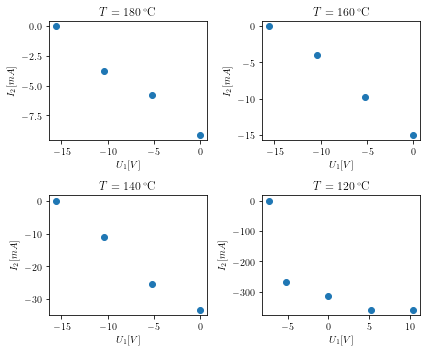

In [4]:
fig, axs = plt.subplots(2, 2, figsize=[6, 5])

aux = [[180, 160, 140, 120], axs.flat, [d180, d160, d140, d120]]  # za prava imena grafov spreminjaj prvi seznam v aux po potrebi


res=[]

for T, ax, data in zip(*aux): 
    U1 = data[1:, 0]
    U2 = data[1:, 1] - data[1, 1]
    I2 = U2 * 1e3 / R

    dU = np.diff(U1)
    res.append(dU)

    ax.scatter(U1, 1e3 * I2, label='meritve')

    ax.set_title(f'$T = {T}\\, \\mathrm{{^\circ C}}$')
    ax.set_ylabel(r'$I_2[mA]$')
    ax.set_xlabel(r'$U_1[V]$')

fig.tight_layout()
fig.savefig('./grafi.pdf')


In [5]:
deltaU = np.mean(list(map(np.mean, res)))
delta2U = np.mean([(deltaU - dU) ** 2 for arr in res for dU in arr])

deltaU, delta2U

(5.004999999999999, 0.693225)